# Einführung

Dieses Dokument beschreibt einen Entlade- und einen Lade-Vorgang eines LiFePo4 Akkus.

Verwendet wurden

* ein Ladegerät des Herstellers LogiRC, Modell "Fusion Emperor L702B Pro"  [Anleitung](https://www.logicrc.com/instructions/O-FS-L702BP.pdf)
* ein Akku der Firma Accu24 / Airbatt [Produkte Seite](https://airbatt.de/AIR-LFP-12-12)
* ein [selbstgebauter Datenlogger](https://github.com/JoeggiCH/PowerLogger)



# Entladen

Für die Messung wurde eine Entladestrom von konstant 2.5A und eine Entlade-Endspannung von 2.6V pro Zelle - also 10.4V eingestellt. Eine Messung pro Sekunde wurde gemacht.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

#for interactive work with the notebook
#pio.renderers.default = 'notebook'
#for the export to pdf:
pio.renderers.default = 'png'

plot_width=1800


In [2]:
# Daten aus CSV einlesen
data = pd.read_csv("250420 Entladen Batt 161.CSV")
data

,millis,micros,status,Load_Voltage,Current_mA,load_Power_mW,20/04/2025 09:46:12
0,2404,2407460,ok,13.71751,7.32422,106.81152,NaN
1,3224,3230364,ok,13.71626,7.32422,106.81152,NaN
2,4225,4230444,ok,13.71876,7.32422,106.81152,NaN
3,5224,5230556,ok,13.72001,7.32422,106.81152,NaN
4,6224,6230608,ok,13.72001,7.32422,106.81152,NaN
...,...,...,...,...,...,...,...
20015,20018770,2838907776,ok,14.16751,6.10352,91.55273,NaN
20016,20019771,2839908464,ok,13.55001,6.10352,91.55273,NaN
20017,20020771,2840908552,ok,12.96001,6.10352,91.55273,NaN
20018,20021771,2841908052,ok,12.39251,6.10352,76.29395,NaN


"millis" ist die Anzahl Milisekunden seit Start des Loggers. Die X-Achse wird in den folgenden Plots mit Sekunden seit Logger-Start beschriftet. 

Fig.1 zeigt, dass das Ladgegerät die Spannung kontinuierlich senkt, um den konstanten Ladestrom aufrecht zu erhalten. Zum Schluss sinkt die Spannung immer schneller bis auf die eingestellten 10.4V und der Entladevorgang wird abgeschlossen. Danach schaltet sich das Ladegerät aus und der Logger misst die Akkuspannung. 

Der Logger misst einen Strom von 2.46A statt der am Ladegerät eingestellten 2.5A. Vermutlich war der Logger noch nicht genau kalibriert.

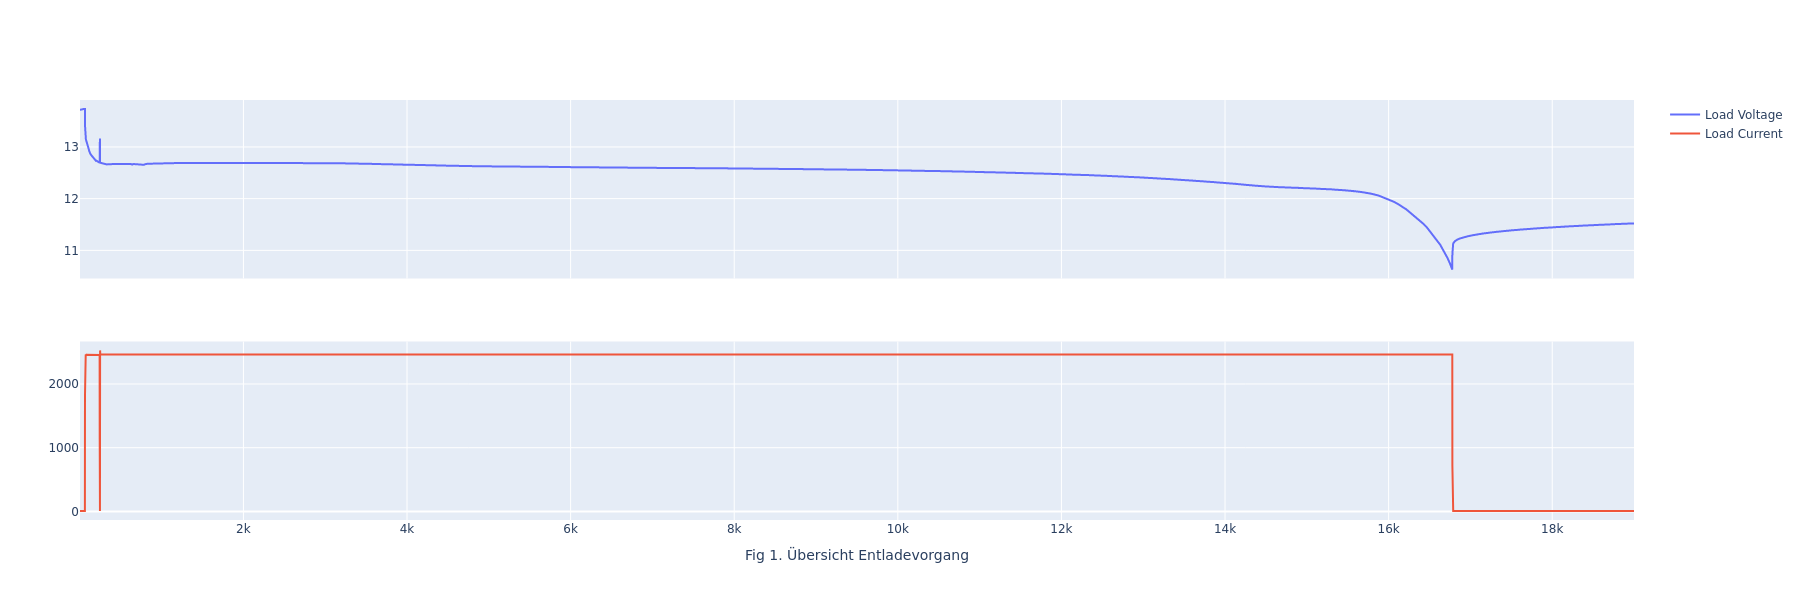

In [3]:
plotd=data[(data['millis']<19000000) ] 
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,)
fig.add_trace(go.Scatter(y=plotd['Load_Voltage'],x=plotd['millis']/1000, name='Load Voltage'),row=1, col=1)
fig.add_trace(go.Scatter(y=plotd['Current_mA'],x=plotd['millis']/1000, name='Load Current'),row=2, col=1)
fig.update_layout(height=600, width=plot_width)
fig.update_xaxes(title_text="Fig 1. Übersicht Entladevorgang", row=2, col=1)
fig.show()

Fig 2: Bei Sekunde 240 unterbricht das Ladegerät den Entladevorgang für 6 Sekunden - vermutlich wird die Batterie Spannung geprüft.

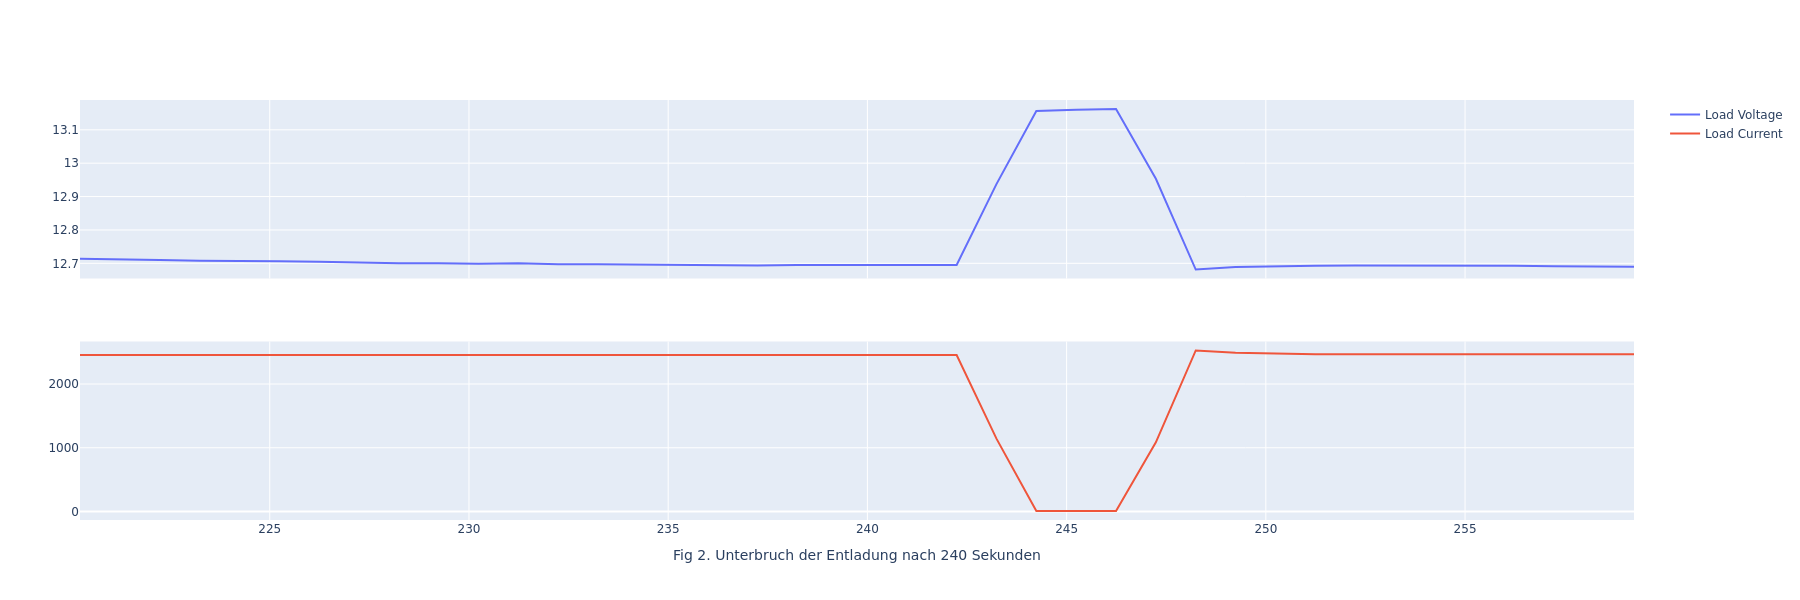

In [4]:
plotd=data[(data['millis']>220000) & (data['millis']<260000) ] 
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,)
fig.add_trace(go.Scatter(y=plotd['Load_Voltage'],x=plotd['millis']/1000, name='Load Voltage'),row=1, col=1)
fig.add_trace(go.Scatter(y=plotd['Current_mA'],x=plotd['millis']/1000, name='Load Current'),row=2, col=1)
fig.update_layout(height=600, width=plot_width)
fig.update_xaxes(title_text="Fig 2. Unterbruch der Entladung nach 240 Sekunden ", row=2, col=1)
fig.show()


# Ladevorgang

Geladen wurde mit 2.5A; der Logger misst 2.410A.

Lade-Endspannung ist mit 3.65V pro Zelle, also 14.6V eingestellt.

In [5]:
# Daten aus CSV einlesen
data = pd.read_csv("250420 Laden Batt 161.CSV")
data

,millis,micros,status,Load_Voltage,Current_mA,load_Power_mW,Data measured from,20/04/2025 15:39:31
0,2438,2440968,ok,11.63876,6.10352,76.29395,NaN,NaN
1,2457,2458128,ok,11.64001,6.10352,61.03516,NaN,NaN
2,2477,2478184,ok,11.64001,6.10352,61.03516,NaN,NaN
3,2497,2498200,ok,11.63876,6.10352,61.03516,NaN,NaN
4,2516,2518236,ok,11.63876,6.10352,61.03516,NaN,NaN
...,...,...,...,...,...,...,...,...
924322,18701377,1521509612,ok,0.03251,6.10352,0.00000,NaN,NaN
924323,18701398,1521529628,ok,0.03251,6.10352,0.00000,NaN,NaN
924324,18701417,1521549664,ok,0.03376,6.10352,0.00000,NaN,NaN
924325,18701437,1521569700,ok,0.03376,6.10352,0.00000,NaN,NaN


## Übersicht 

Der Ladevorgang dauerte 18700 Sekunden, also 5h 12 Min.

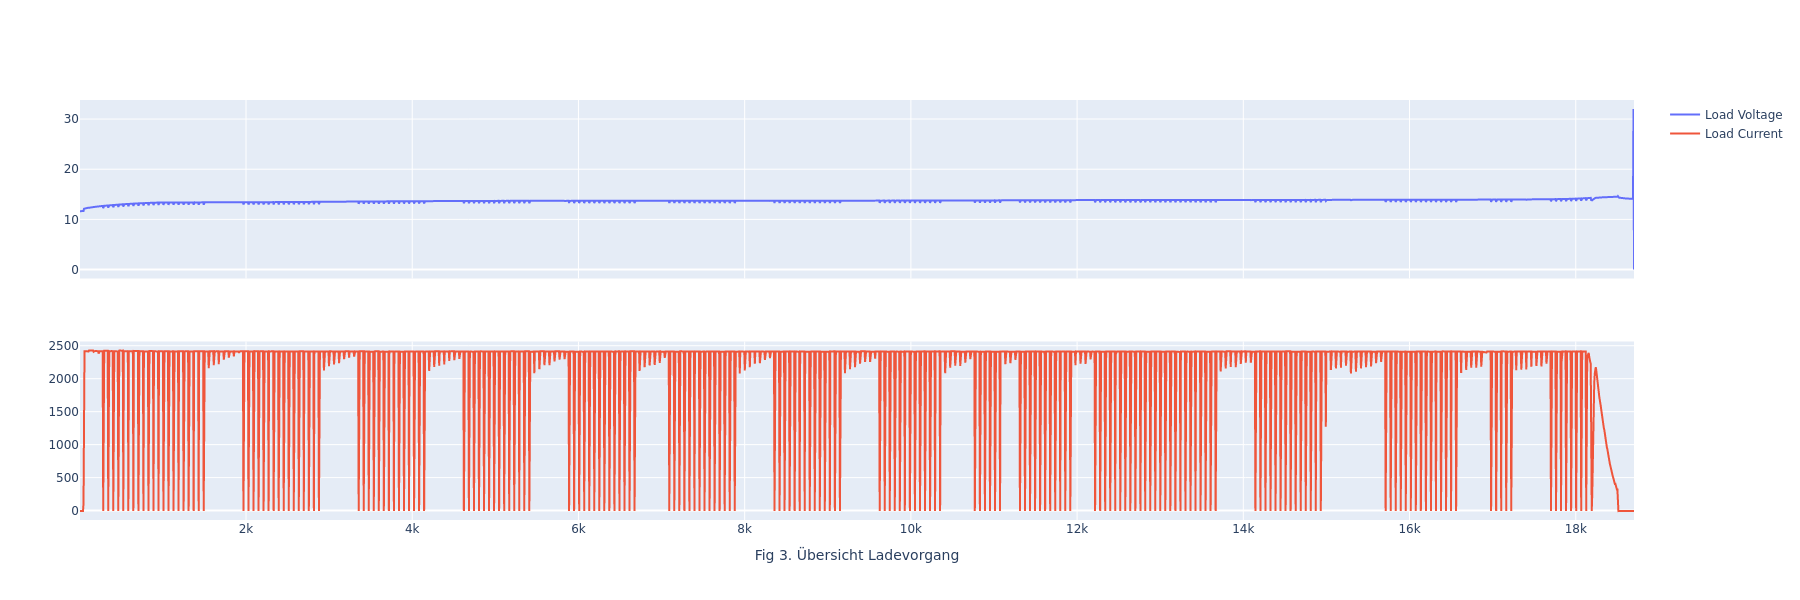

In [6]:
# Für die Uebersicht nur jeden 300. Punkt in sh300 nehmen
plotd=data.iloc[::300]
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,)
fig.add_trace(go.Scatter(y=plotd['Load_Voltage'],x=plotd['millis']/1000, name='Load Voltage'),row=1, col=1)
fig.add_trace(go.Scatter(y=-plotd['Current_mA'],x=plotd['millis']/1000, name='Load Current'),row=2, col=1)
fig.update_layout(height=600, width=plot_width)
fig.update_xaxes(title_text="Fig 3. Übersicht Ladevorgang", row=2, col=1)

fig.show()

## Beginn des Ladevorgangs

Zu Beginn wird die Spannung für ca 1 Sekunde erhöht, was den Strom zur Batterie erhöht. Vermutlich wird so detektiert, ob tatsächlich ein Akku angeschlossen ist.
Danach wird die Spannung kontinuierlich erhöht bis nach ca 51 Sekunden die 2.5A Ladestrom vorliegen. Ab hier beginnt die "Constant Current" Phase des CCCV Ladevorgangs.

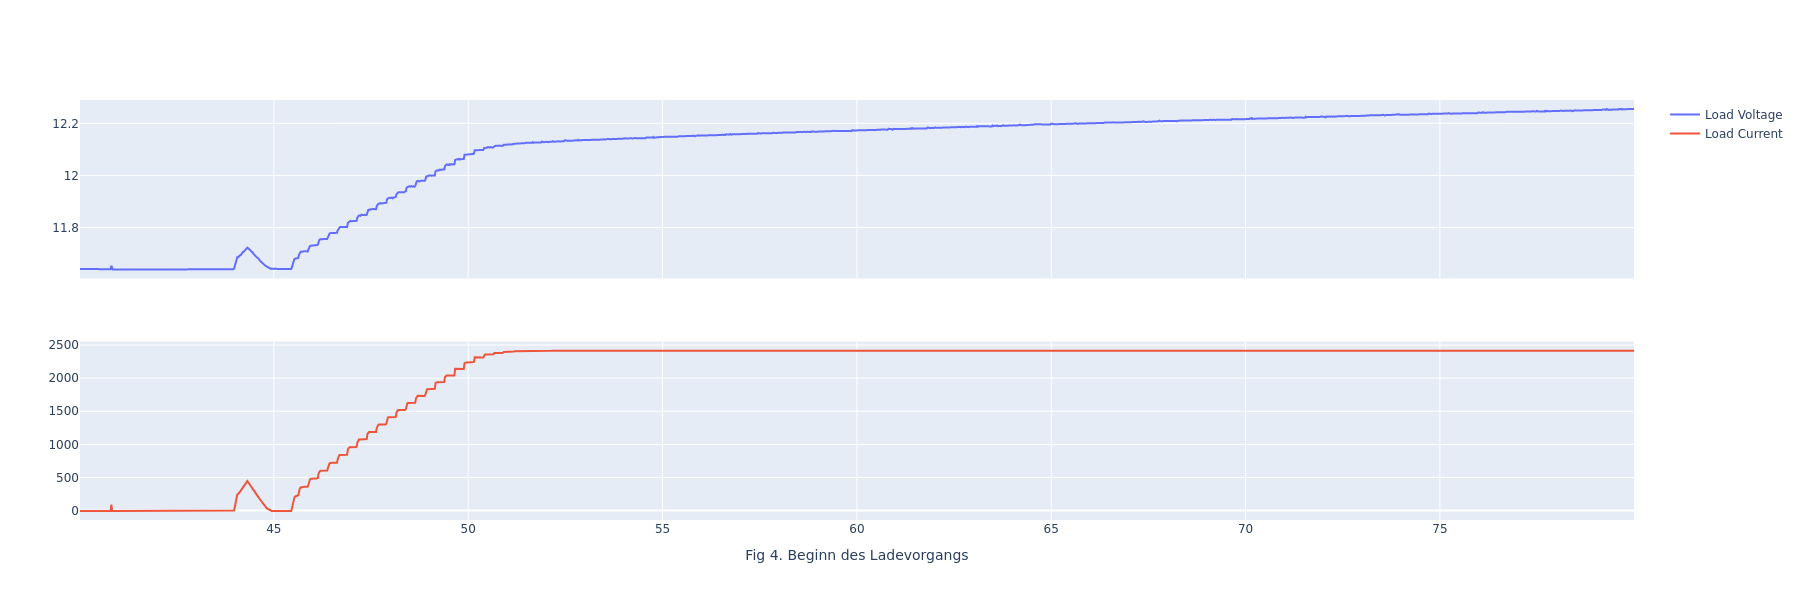

In [7]:
plotd=data[(data['millis']>40000) & (data['millis']<80000)] 
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,)
fig.add_trace(go.Scatter(y=plotd['Load_Voltage'],x=plotd['millis']/1000, name='Load Voltage'),row=1, col=1)
fig.add_trace(go.Scatter(y=-plotd['Current_mA'],x=plotd['millis']/1000, name='Load Current'),row=2, col=1)
fig.update_layout(height=600, width=plot_width)
fig.update_xaxes(title_text="Fig 4. Beginn des Ladevorgangs", row=2, col=1)

fig.show()

## Aussetzen des Ladevorgangs zur Messung des Ladezustandes

Der Emperor Charger unterbricht den Ladevorgang jede Minute für 4 Sekunden. Laut Gemini wird dies getan, um die Open Circuit Voltage (OCV) zu messen - also die Batterie-Spannung ohne Ladestrom - zu messen. Mit OCV kann der Ladezustand der Batterie (SoC - State of Charge) besser beurteilt werden.

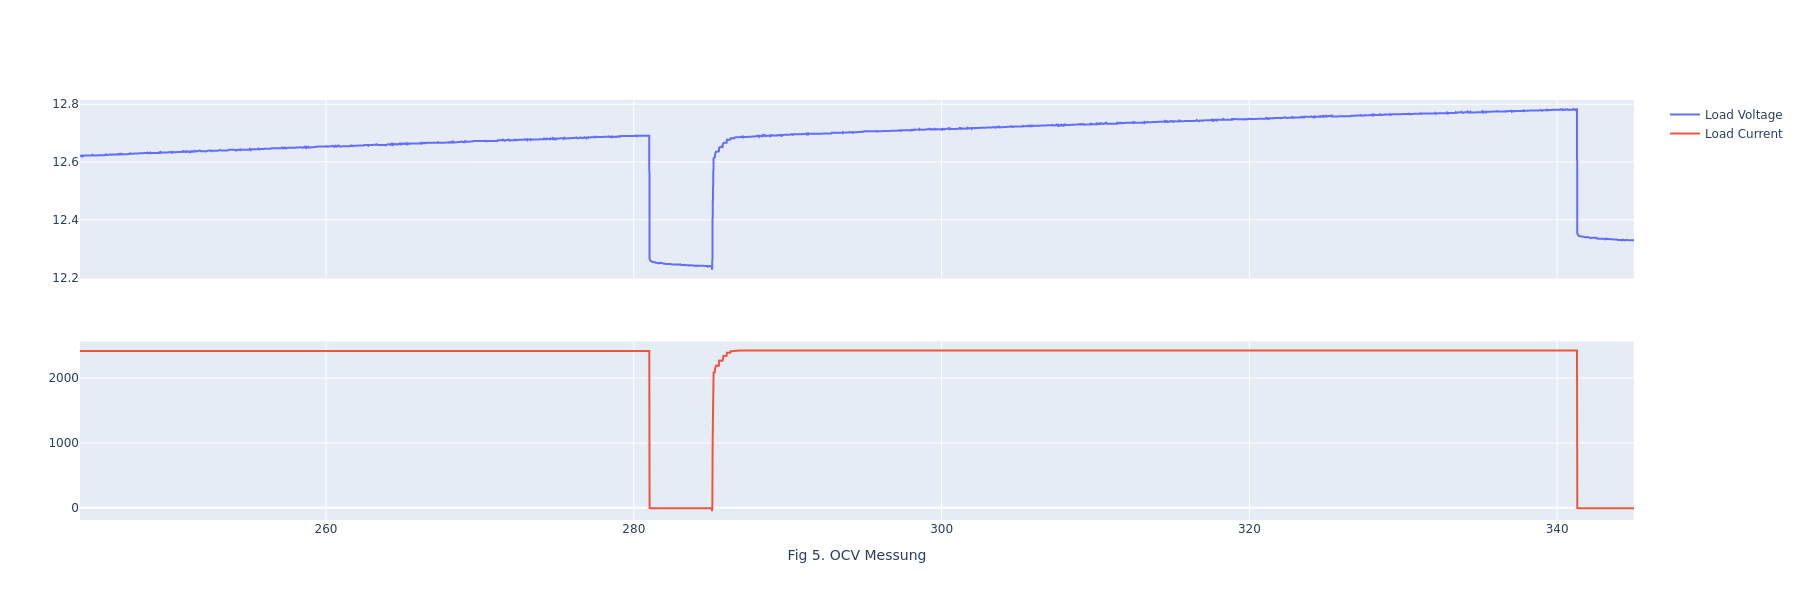

In [8]:
plotd=data[(data['millis']>244000) & (data['millis']<345000)]
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,)
fig.add_trace(go.Scatter(y=plotd['Load_Voltage'],x=plotd['millis']/1000, name='Load Voltage'),row=1, col=1)
fig.add_trace(go.Scatter(y=-plotd['Current_mA'],x=plotd['millis']/1000, name='Load Current'),row=2, col=1)
fig.update_layout(height=600, width=plot_width)
fig.update_xaxes(title_text="Fig 5. OCV Messung", row=2, col=1)

fig.show()


## Ende des Ladevorgangs

Bei Sekunde 18100 findet noch ein "normaler" Ladezyklus zwischen zwei OCV Messungen statt - in diesem Zyklus erreicht der Ladestrom die 2.5A. Im folgenden Zyklus wird die Spannung wieder angehoben aber ungefaehr bei Sekunde 18160 beginnt der Strom trotz steigender Ladespannung zu sinken. Dies wird offenbar als Ende der CC Phase interpretiert. Der Charger geht danach zur OCV Messung während 4 Sekunden über, steigert die Ladespannung nochmals für 2 Sekunden, senkt die Spannung wieder ab und misst nochmals OCV für 7 Sekunden.

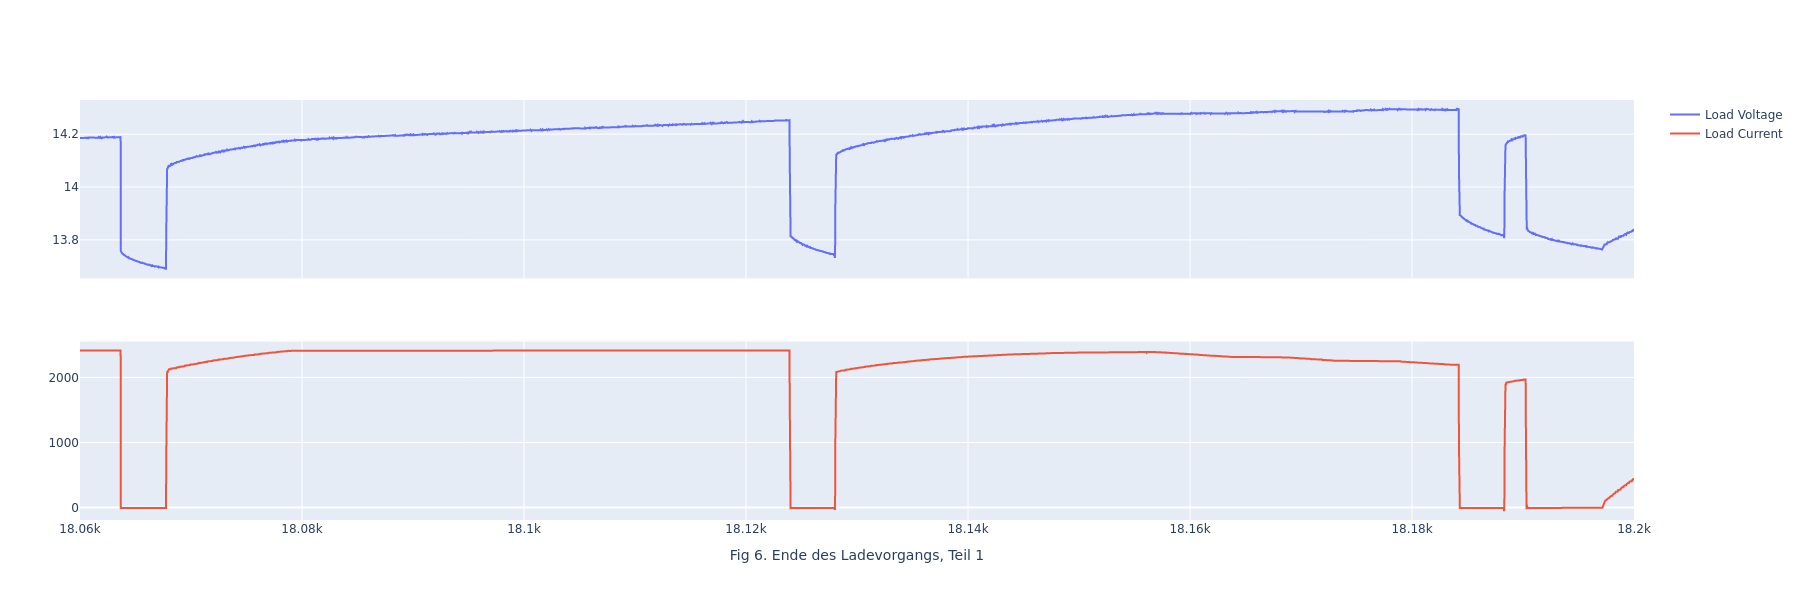

In [9]:
plotd=data[(data['millis']>18060000) & (data['millis']<18200000) ] 
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,)
fig.add_trace(go.Scatter(y=plotd['Load_Voltage'],x=plotd['millis']/1000, name='Load Voltage'),row=1, col=1)
fig.add_trace(go.Scatter(y=-plotd['Current_mA'],x=plotd['millis']/1000, name='Load Current'),row=2, col=1)
fig.update_layout(height=600, width=plot_width)
fig.update_xaxes(title_text="Fig 6. Ende des Ladevorgangs, Teil 1", row=2, col=1)

fig.show()


Ca ab Sekunde 19170 beginnt ein langsamer Anstieg der Ladespannung, der Strom erhöht sich bis etwa Sekunde 18250 und sinkt dann ab - bei steigender Ladespannung ab. 

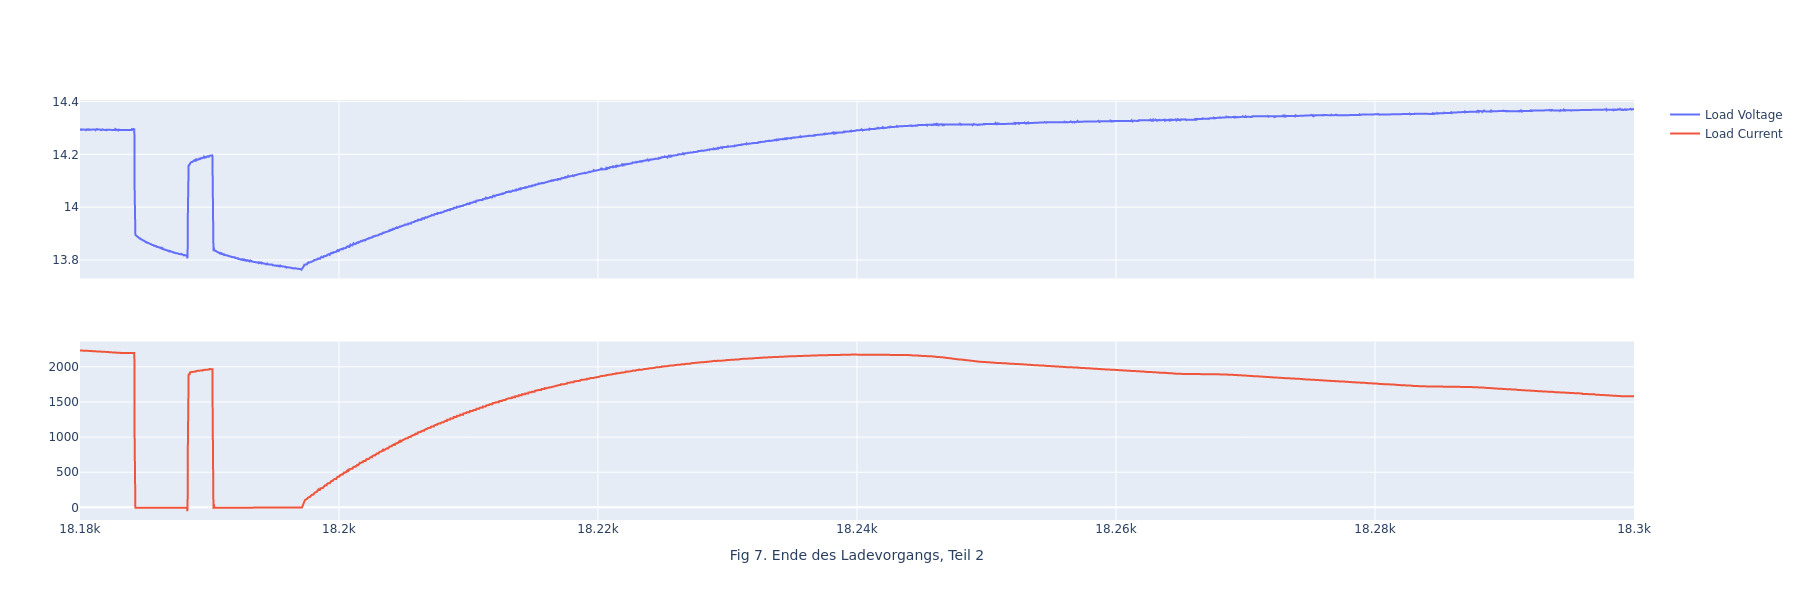

In [10]:
plotd=data[(data['millis']>18180000) & (data['millis']<18300000)] 
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,)
fig.add_trace(go.Scatter(y=plotd['Load_Voltage'],x=plotd['millis']/1000, name='Load Voltage'),row=1, col=1)
fig.add_trace(go.Scatter(y=-plotd['Current_mA'],x=plotd['millis']/1000, name='Load Current'),row=2, col=1)
fig.update_layout(height=600, width=plot_width)
fig.update_xaxes(title_text="Fig 7. Ende des Ladevorgangs, Teil 2", row=2, col=1)

fig.show()


Bei weiter langsam steigender Spannung nimmt der Ladestrom immer weiter ab bis bei Sekunde 18501 der Ladevorgang beendet wird.

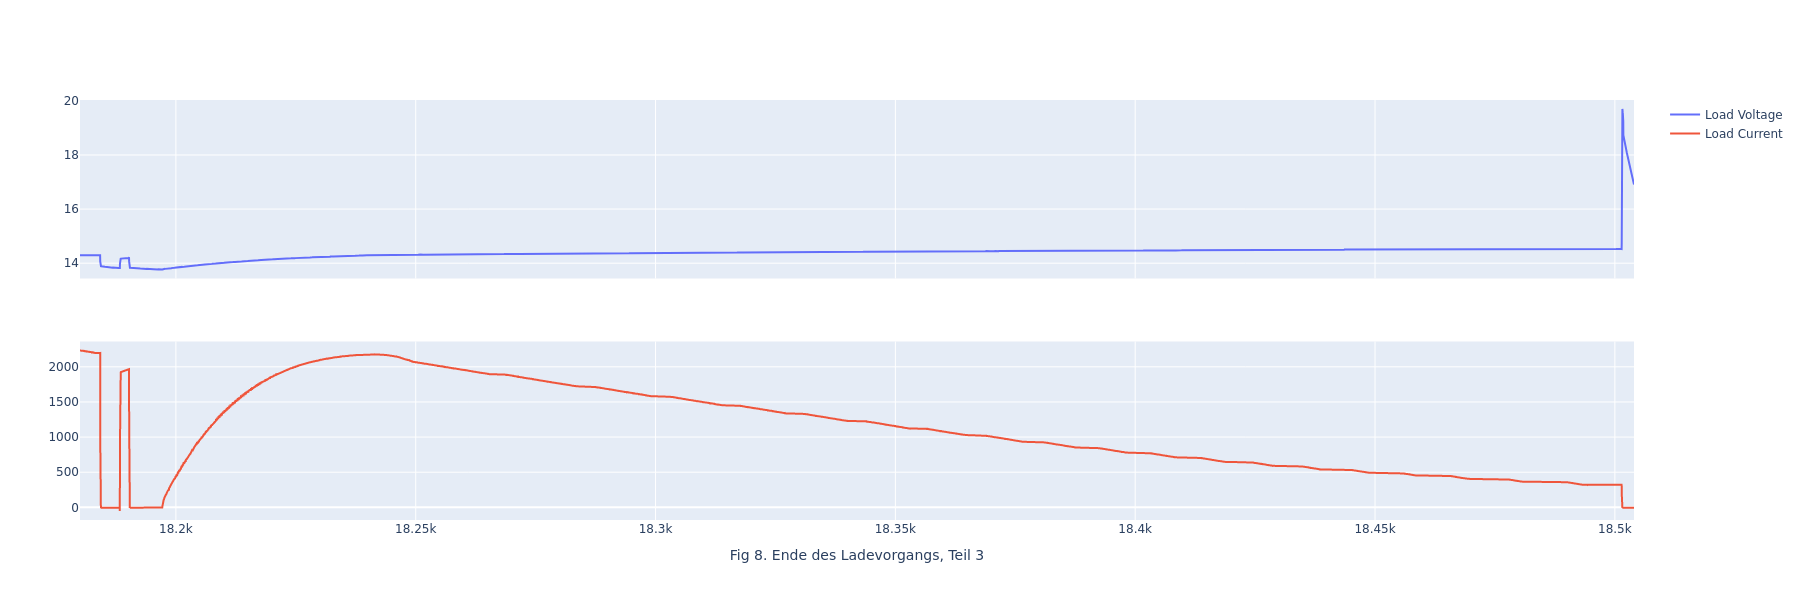

In [11]:
plotd=data[(data['millis']>18180000) & (data['millis']<18504000)] 
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,)
fig.add_trace(go.Scatter(y=plotd['Load_Voltage'],x=plotd['millis']/1000, name='Load Voltage'),row=1, col=1)
fig.add_trace(go.Scatter(y=-plotd['Current_mA'],x=plotd['millis']/1000, name='Load Current'),row=2, col=1)
fig.update_layout(height=600, width=plot_width)
fig.update_xaxes(title_text="Fig 8. Ende des Ladevorgangs, Teil 3", row=2, col=1)
fig.show()


Nochmals die ganze Endphase im Überblick. Die Spannungsspitzen zum Schluss sind vermutlich deshalb vorhanden, weil die Batterie abgehaengt wurde und der Charger damit detektiert, ob der Akku noch angeschlossen ist.

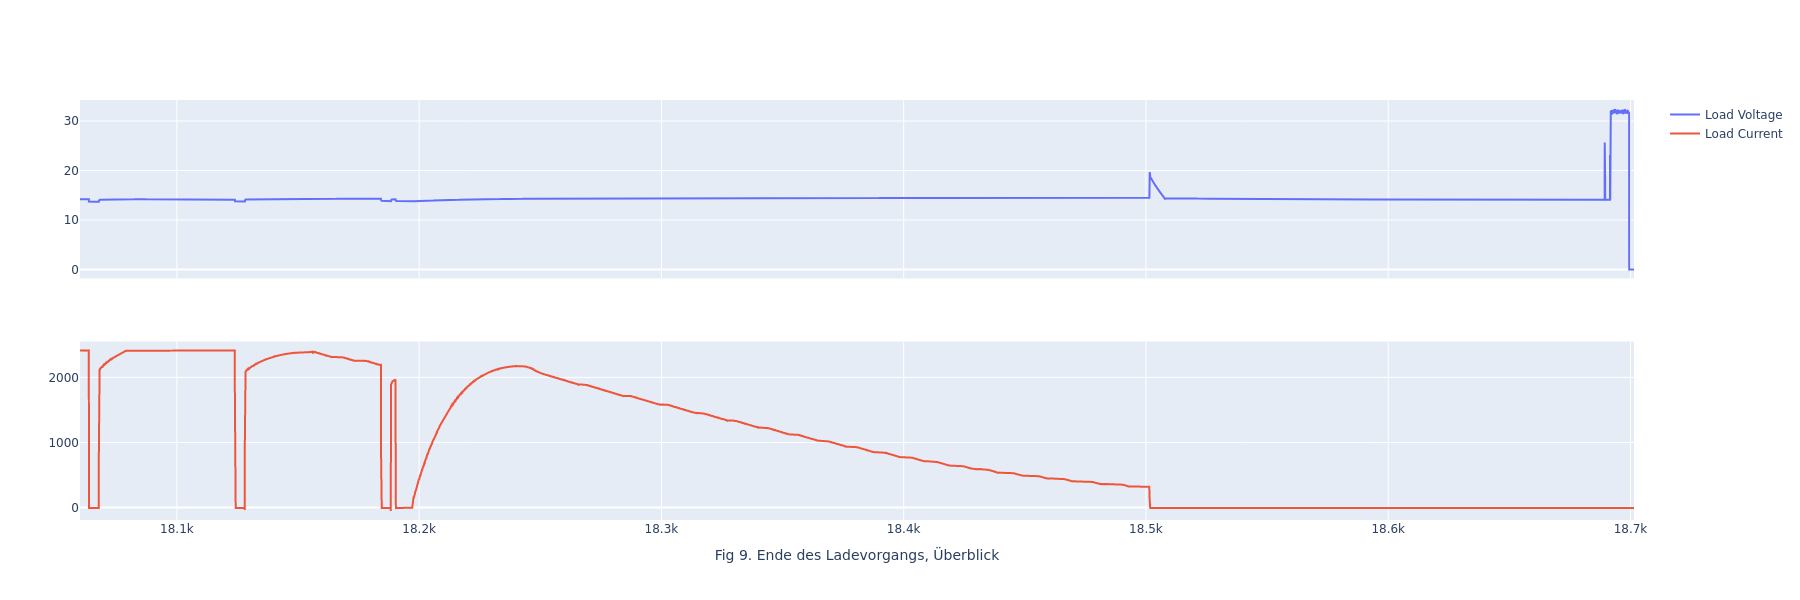

In [12]:
plotd=data[(data['millis']>18060000) ] 
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,)
fig.add_trace(go.Scatter(y=plotd['Load_Voltage'],x=plotd['millis']/1000, name='Load Voltage'),row=1, col=1)
fig.add_trace(go.Scatter(y=-plotd['Current_mA'],x=plotd['millis']/1000, name='Load Current'),row=2, col=1)
fig.update_layout(height=600, width=plot_width)
fig.update_xaxes(title_text="Fig 9. Ende des Ladevorgangs, Überblick", row=2, col=1)

fig.show()
